# 程序说明

说明：该程序是一个包含两个卷积层、一个池化层和一个全连接层组成的神经网络。

数据集：MNIST

In [2]:
cd /home/chenxupeng/projects/practice

/home/chenxupeng/projects/practice


## 1.加载keras模块

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD, Adam, RMSprop
from load_data import load_mnist_2d
from keras.callbacks import TensorBoard
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2.变量初始化

In [4]:
batch_size = 128 
nb_classes = 10
nb_epoch = 12

# 输入数据的维度
img_rows, img_cols = 28, 28
# 使用的卷积滤波器的数量
nb_filters = 32
# 用于 max pooling 的池化面积
pool_size = (2, 2)
# 卷积核的尺寸
kernel_size = (3, 3)

## 3.准备数据
需要将数据还原成28*28大小的数组

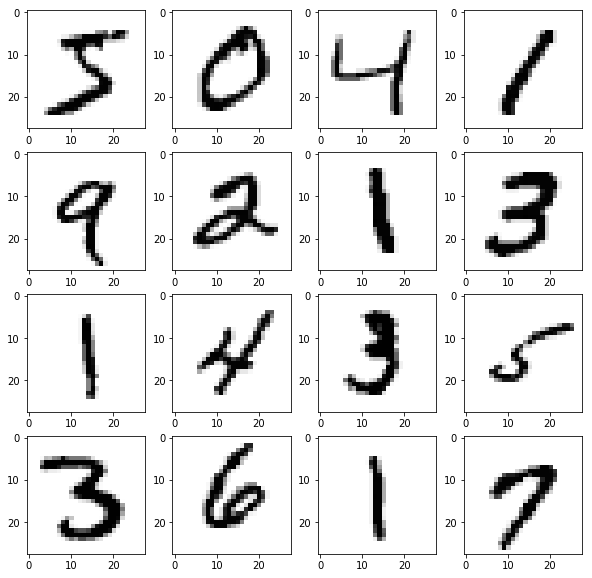

In [8]:
X_train, X_test, Y_train, Y_test = load_mnist_2d('data')
fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(X_train[4*i+j].reshape(28,28),cmap=cm.Greys)

### 转换类标号

In [10]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 4.建立模型
### 使用Sequential（）

In [14]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

/home/chenxupeng/apps/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """
/home/chenxupeng/apps/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


### 打印模型

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
__________

## 5.训练与评估
### 编译模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### 迭代训练

In [19]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

/home/chenxupeng/apps/anaconda2/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2813 - acc: 0.9138 - val_loss: 0.0599 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0953 - acc: 0.9723 - val_loss: 0.0444 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0737 - acc: 0.9787 - val_loss: 0.0346 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0628 - acc: 0.9812 - val_loss: 0.0330 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0550 - acc: 0.9842 - val_loss: 0.0355 - val_acc: 0.9877
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0310 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0435 - acc: 0.9865 - val_loss: 0.0292 - val_ac

### 模型评估

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0321088282784
Test accuracy: 0.9896
